This Kernel for someone want to deep dive into image classification. I use CNN for classification model. If you found this Kernel helpful please up vote it. If you have some feedback and question don't forget to comment below. 

I have simplier model with 
* https://www.kaggle.com/uysimty/get-start-image-classification

# Import Library

In [1]:
import numpy as np
import pandas as pd 
import os
os.environ["CUDA_VISIBLE_DEVICES"]="4"; 

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random


import tensorflow as tf
from keras import backend as K
tf.debugging.set_log_device_placement(True)

Using TensorFlow backend.
/home2/kwangsookim/kskim_test/input/all-dogs/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home2/kwangsookim/kskim_test/input/all-dogs/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home2/kwangsookim/kskim_test/input/all-dogs/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

# Define Constants

In [2]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# Prepare Traning Data

In [3]:
df = pd.read_csv("../ISICArchive_Detail.csv")

In [4]:
df_data = df[(df["meta-clinical-diagnosis"]=="nevus") | (df["meta-clinical-diagnosis"]=="melanoma")]

In [5]:
df_data

,_id,name,_modelType,created,creator-_id,creator-name,meta-acquisition-image_type,meta-clinical-age_approx,meta-acquisition-pixelsX,meta-clinical-anatom_site_general,meta-acquisition-pixelsY,meta-clinical-benign_malignant,meta-clinical-diagnosis,meta-clinical-diagnosis_confirm_type,meta-clinical-melanocytic,meta-clinical-sex
0,5436e3abbae478396759f0cf,ISIC_0000000,image,2014-10-09T19:36:11.989000+00:00,5450e996bae47865794e4d0d,User 6VSN,dermoscopic,55.0,1022,anterior torso,767,benign,nevus,NaN,True,female
1,5436e3acbae478396759f0d1,ISIC_0000001,image,2014-10-09T19:36:12.070000+00:00,5450e996bae47865794e4d0d,User 6VSN,dermoscopic,30.0,1022,anterior torso,767,benign,nevus,NaN,True,female
2,5436e3acbae478396759f0d3,ISIC_0000002,image,2014-10-09T19:36:12.152000+00:00,5450e996bae47865794e4d0d,User 6VSN,dermoscopic,60.0,1022,upper extremity,767,malignant,melanoma,histopathology,True,female
3,5436e3acbae478396759f0d5,ISIC_0000003,image,2014-10-09T19:36:12.233000+00:00,5450e996bae47865794e4d0d,User 6VSN,dermoscopic,30.0,1022,upper extremity,767,benign,nevus,NaN,True,male
4,5436e3acbae478396759f0d7,ISIC_0000004,image,2014-10-09T19:36:12.315000+00:00,5450e996bae47865794e4d0d,User 6VSN,dermoscopic,80.0,1022,posterior torso,767,malignant,melanoma,histopathology,True,male
5,5436e3acbae478396759f0d9,ISIC_0000005,image,2014-10-09T19:36:12.399000+00:00,5450e996bae47865794e4d0d,User 6VSN,dermoscopic,40.0,1022,anterior torso,767,benign,nevus,NaN,True,female
6,5436e3acbae478396759f0db,ISIC_0000006,image,2014-10-09T19:36:12.482000+00:00,5450e996bae47865794e4d0d,User 6VSN,dermoscopic,25.0,1022,posterior torso,767,benign,nevus,NaN,True,female
7,5436e3acbae478396759f0dd,ISIC_0000007,image,2014-10-09T19:36:12.563000+00:00,5450e996bae47865794e4d0d,User 6VSN,dermoscopic,25.0,1022,posterior torso,767,benign,nevus,NaN,True,female
8,5436e3acbae478396759f0df,ISIC_0000008,image,2014-10-09T19:36:12.650000+00:00,5450e996bae47865794e4d0d,User 6VSN,dermoscopic,30.0,1022,anterior torso,767,benign,nevus,NaN,True,female
9,5436e3acbae478396759f0e1,ISIC_0000009,image,2014-10-09T19:36:12.731000+00:00,5450e996bae47865794e4d0d,User 6VSN,dermoscopic,30.0,1022,anterior torso,767,benign,nevus,NaN,True,female


In [6]:
############ df_data  사용될 전체 메타 원본 데이터
df_data_use = df_data.copy()

In [7]:
columns = ["_id", "_modelType", "created","creator-_id", "creator-name", "meta-acquisition-image_type", "meta-clinical-age_approx" \
          ,"meta-acquisition-pixelsX","meta-clinical-anatom_site_general","meta-acquisition-pixelsY","meta-clinical-benign_malignant" \
          ,"meta-clinical-diagnosis_confirm_type","meta-clinical-melanocytic","meta-clinical-sex"]
df_data_use.drop(columns, inplace=True, axis=1)

### See Total In count

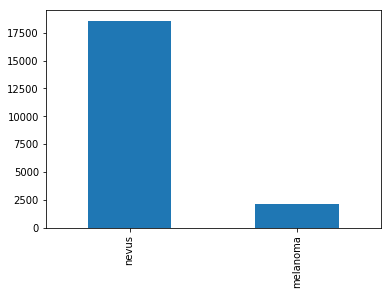

In [8]:
df_data_use['meta-clinical-diagnosis'].value_counts().plot.bar()

From our data we have   {'nevus': 18566, 'melanoma': 2169}

# Build Model

<img src="https://i.imgur.com/ebkMGGu.jpg" width="100%"/>

* **Input Layer**: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
* **Conv Layer**: This layer will extract features from image.
* **Pooling Layer**: This layerreduce the spatial volume of input image after convolution.
* **Fully Connected Layer**: It connect the network from a layer to another layer
* **Output Layer**: It is the predicted values layer. 

# Data Split

In [9]:
df_data_use =  df_data_use.rename(columns={"meta-clinical-diagnosis": "category"})
df_data_use =  df_data_use.rename(columns={"name": "filename"})
df_data_use["category"] = df_data_use["category"].replace({"nevus": "0",  "melanoma": "1"}) 

In [10]:
df_data_use["filename"] = df_data_use["filename"] + ".jpg" 

In [11]:
## SPlit Test / Train data

In [12]:
df_data_use = df_data_use.reset_index(drop=True)

In [13]:
df_only_nevus = df_data_use[df_data_use["category"]=="0"]
df_only_melanoma = df_data_use[df_data_use["category"]=="1"]

In [14]:
np.random.seed(42)

df_test_melanoma = df_only_melanoma.loc \
[np.random.permutation(df_only_melanoma.index)[:500]]

df_test_nevus = df_only_nevus.loc \
[np.random.permutation(df_only_nevus.index)[:500]]


df_train_melanoma = df_only_melanoma.loc \
[np.random.permutation(df_only_melanoma.index)[500:]]

df_train_nevus = df_only_nevus.loc \
[np.random.permutation(df_only_nevus.index)[500:]]



In [15]:
'''
df_data_use(20735 rows × 2 columns)
##
df_only_nevus(18566 rows × 2 columns)
df_only_melanoma(2169 rows × 2 columns)
##
df_test_nevus(500 rows × 2 columns) 
df_test_melanoma(500 rows × 2 columns)
##
df_train_nevus(18066 rows × 2 columns)
df_train_melanoma (1669 rows × 2 columns)
 '''

'\ndf_data_use(20735 rows × 2 columns)\n##\ndf_only_nevus(18566 rows × 2 columns)\ndf_only_melanoma(2169 rows × 2 columns)\n##\ndf_test_nevus(500 rows × 2 columns) \ndf_test_melanoma(500 rows × 2 columns)\n##\ndf_train_nevus(18066 rows × 2 columns)\ndf_train_melanoma (1669 rows × 2 columns)\n '

In [16]:
train_frames = [df_train_nevus,df_train_melanoma]
test_frames = [df_test_nevus,df_test_melanoma]

df_trains = pd.concat(train_frames)
df_tests = pd.concat(test_frames)

#df_test = df_only_melanoma.loc \
#        [np.random.permutation(df_only_melanoma.index)[:500]]\
#        | df_only_nevus.loc \
#        [np.random.permutation(df_only_nevus.index)[:500]]

In [17]:
df_trains = df_trains.reindex(np.random.permutation(df_trains.index))
df_trains = df_trains.reset_index(drop=True)

df_tests = df_tests.reindex(np.random.permutation(df_tests.index))
df_tests = df_tests.reset_index(drop=True)

In [18]:
train_df, validate_df = train_test_split(df_trains, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

0    14461
1     1327
Name: category, dtype: int64
nevus: 0,  melanoma: 1


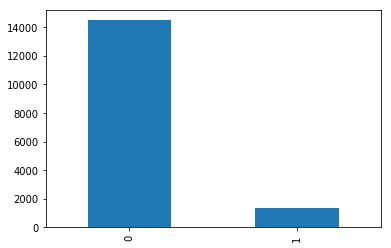

In [19]:
train_df['category'].value_counts().plot.bar()
print(train_df['category'].value_counts())
print( "nevus: 0,  melanoma: 1")

0    3605
1     342
Name: category, dtype: int64
nevus: 0,  melanoma: 1


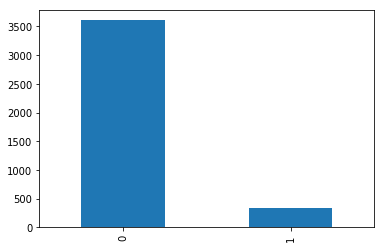

In [20]:
validate_df['category'].value_counts().plot.bar()
print(validate_df['category'].value_counts())
print( "nevus: 0,  melanoma: 1")

In [21]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=64

# Traning Generator

In [22]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "../ISICArchive/", 
    x_col="filename",
    y_col="category",
    target_size=IMAGE_SIZE,
    class_mode="categorical",
    batch_size=batch_size
)

Found 15788 validated image filenames belonging to 2 classes.


### Validation Generator

In [23]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "../ISICArchive/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 3947 validated image filenames belonging to 2 classes.


# See how our generator work

In [24]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "../ISICArchive/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


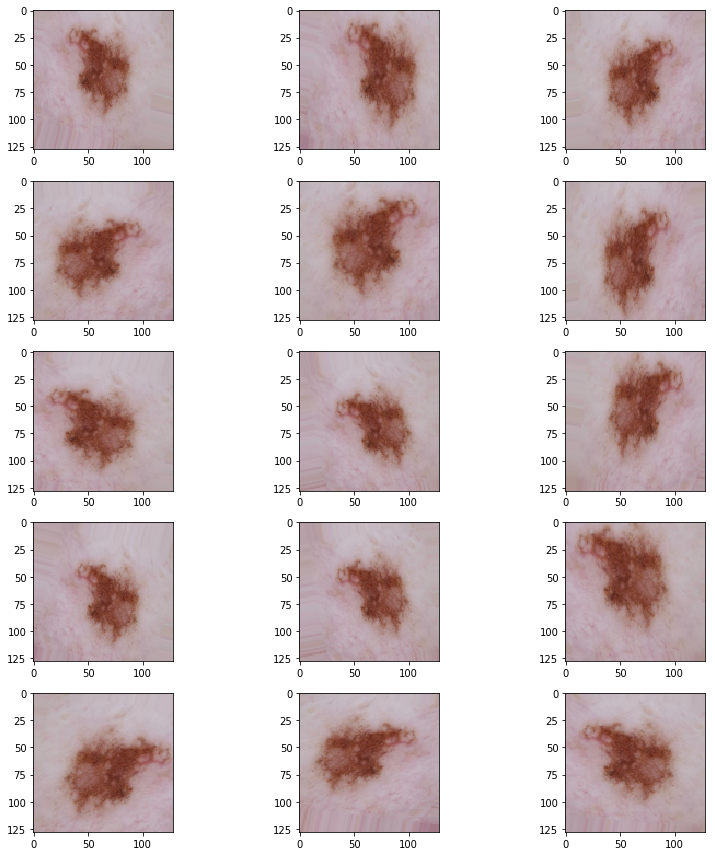

In [25]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Seem to be nice 

# Prepare Testing Data

In [26]:
#test_filenames = os.listdir("../input/test1/test1")
test_df = pd.DataFrame({
    'filename': df_tests['filename']
})
nb_samples = test_df.shape[0]

In [27]:
os.environ["HDF5_USE_FILE_LOCKING"]='FALSE';

# Model define

In [28]:
#FAST_RUN = False
#IMAGE_WIDTH=128
#IMAGE_HEIGHT=128
#IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
#IMAGE_CHANNELS=3

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes
    
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)      

In [29]:
from keras.models import load_model
model.load_weights('model.h5')

# Create Testing Generator

In [30]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../ISICArchive/",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 1000 validated image filenames.


# Predict

In [31]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [32]:
test_df['category'] = np.argmax(predict, axis=-1)

In [33]:
y_true =  df_tests['category'].to_numpy().astype(int)
y_pred = test_df['category'].to_numpy().astype(int)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

In [35]:
(tn, fp, fn, tp)

(447, 53, 106, 394)

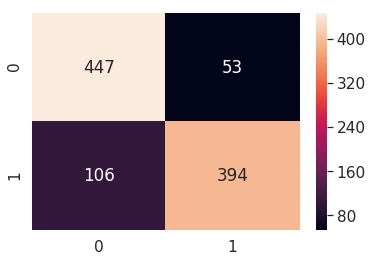

In [36]:
import seaborn as sn
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm, annot=True,fmt='g')

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       500
           1       0.88      0.79      0.83       500

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



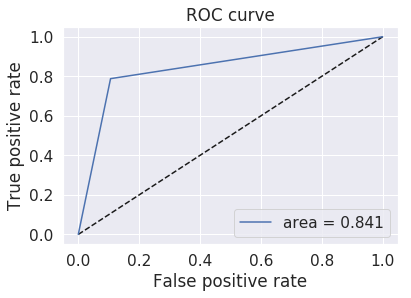

In [38]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_true, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [85]:
predict

array([[8.9214760e-01, 1.0785236e-01],
       [6.3619494e-01, 3.6380509e-01],
       [9.2302126e-01, 7.6978758e-02],
       ...,
       [9.9939251e-01, 6.0745288e-04],
       [4.6239299e-01, 5.3760701e-01],
       [4.6212652e-01, 5.3787357e-01]], dtype=float32)